<a href="https://colab.research.google.com/github/dbeniteze/clima_autoencoder/blob/master/clima_conv_autoencoder_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install keras==2.3.1

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip     #basemap

!pip install pyproj==1.9.6   #posible arreglo



%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

     |████████████████████████████████| 378kB 7.0MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (926 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 145118 files and d

     |████████████████████████████████| 2.8MB 7.2MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702063 sha256=b455e49583db08cb3aedd59c6b5e57289125dc23d4546293782c92aebecf3c15
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.5.0
    Uninstalling pyproj-2.5.0:
      Successfully uninstalled pyproj-2.5.0
TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


In [0]:
# Larger CNN for the MNIST Dataset
from keras import backend as K
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Reshape
from keras.layers import Flatten, BatchNormalization
from keras.layers import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, AveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras import backend as K

import os




X_train = np.load("drive/My Drive/temperaturas/temp_tropp.npy", allow_pickle=True)




In [0]:
from keras.layers import  AveragePooling2D
X_train = X_train.reshape((X_train.shape[0], 73, 144, 1)).astype('float32')

1#rango de temperaturas
minimo = np.min(X_train)
maximo = np.max(X_train)

X_train = (X_train - minimo) / (maximo - minimo)


In [0]:
#autoencoder con Conv2DTranspose
input_img = Input(shape=(73, 144, 1))  # adapt this if using `channels_first` image data format
LF = (4,5)
x = Conv2D(64, kernel_size=LF, activation='elu')(input_img)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Conv2D(32, kernel_size=LF, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Conv2D(16, kernel_size=LF, activation='elu')(x)
x = BatchNormalization()(x)
x = AveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Conv2D(8, kernel_size=LF, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
encoded =Conv2D(4, kernel_size=LF, activation='elu')(x)

#encoded = Model(input_img, encoded)
#encoded.summary()

x = Conv2DTranspose(4, kernel_size=LF, activation='elu')(encoded)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Conv2DTranspose(8, kernel_size=LF, activation='elu')(x)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
x = Dropout(0.4)(x)
x = Conv2DTranspose(16, kernel_size=LF, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Conv2DTranspose(32, kernel_size=LF, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
decoded = Conv2DTranspose(1, kernel_size=LF, activation='sigmoid')(x)



autoencoder = Model(input_img, decoded)
autoencoder.summary()

In [0]:
from keras.layers import PReLU, Add


#autoencoder con Conv2DTranspose
input_img = Input(shape=(73, 144, 1))  
LF = (4,5)    #reduccion input 73 a num par
x = Conv2D(64, kernel_size=LF)(input_img)   #70 140 
x = PReLU(alpha_initializer='zeros')(x)
x = BatchNormalization()(x)

x = Conv2D(32, kernel_size=LF)(x) 
x = PReLU(alpha_initializer='zeros')(x)        #67 136
x = BatchNormalization()(x)

x = Conv2D(32, kernel_size=LF)(x)  
x = PReLU(alpha_initializer='zeros')(x)       #64 132
x = BatchNormalization()(x)

LF = (3,3)
x = Conv2D(16, kernel_size=LF, strides=2, padding= "same")(x) 
x = PReLU(alpha_initializer='zeros')(x) #32, 66
x = BatchNormalization()(x)

x = Conv2D(16, kernel_size=LF, strides=2, padding= "same")(x)
x = PReLU(alpha_initializer='zeros')(x)
x = BatchNormalization()(x)

x = Conv2D(8, kernel_size=LF, padding= "same")(x)
x = PReLU(alpha_initializer='zeros')(x)
x = BatchNormalization()(x)

encoded =Conv2D(4, kernel_size=LF, padding= "same")(x)
x = PReLU(alpha_initializer='zeros')(x)

#encoded = Model(input_img, encoded)
#encoded.summary()

x = Conv2DTranspose(4, kernel_size=LF, padding= "same")(encoded)
x = PReLU(alpha_initializer='zeros')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(8, kernel_size=LF, padding= "same")(x)
x = PReLU(alpha_initializer='zeros')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(16, kernel_size=LF, strides=2, padding= "same")(x)
x = PReLU(alpha_initializer='zeros')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(32, kernel_size=LF, strides=2, padding= "same")(x)
x = PReLU(alpha_initializer='zeros')(x)
x = BatchNormalization()(x)

LF = (4,5)
x = Conv2DTranspose(32, kernel_size=LF)(x)
x = PReLU(alpha_initializer='zeros')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(64, kernel_size=LF)(x)
x = PReLU(alpha_initializer='zeros')(x)
x = BatchNormalization()(x)

decoded = Conv2DTranspose(1, kernel_size=LF, activation='sigmoid')(x)



autoencoder = Model(input_img, decoded)
autoencoder.summary()

In [0]:
from keras.models import load_model

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
autoencoder = load_model("modelo_clima_prelu.h5", custom_objects={'coeff_determination': coeff_determination})

In [0]:
from keras.models import load_model


def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

#autoencoder_b = load_model("modelo_clima.h5")
#autoencoder_b = load_model('modelo_clima.h5', custom_objects={'coeff_determination': coeff_determination})


#autoencoder_b.compile(optimizer=Adam(learning_rate=0.00005),  loss='mse', metrics=[coeff_determination])

epoch = 100

#def lr_schedule(epoch):
#    lrate = 0.001
#    if epoch > 25:
#        lrate = 0.0003
#    if epoch > 50:
#        lrate = 0.0001
#    return lrate


def lr_schedule(epoch):
    lrate = 0.00007
    if epoch > 25:
        lrate = 0.00005
    if epoch > 50:
        lrate = 0.00001
    return lrate


# Loss functtion
def ssim_loss(y_true, y_pred):
  return tf.reduce_mean(tf.image.ssim(y_true, y_pred, 2.0))

autoencoder.compile(optimizer=Adam(learning_rate=lr_schedule(epoch)),  loss="mse", metrics=[coeff_determination])

autoencoder.fit(X_train, X_train,
                epochs=epoch,
                batch_size=128,
                shuffle=True,
                validation_split=0.1)

Train on 23713 samples, validate on 2635 samples
Epoch 1/100
23713/23713 [==============================] - 94s 4ms/step - loss: 1.8800e-04 - coeff_determination: 0.9883 - val_loss: 2.2467e-04 - val_coeff_determination: 0.9869
Epoch 2/100
23713/23713 [==============================] - 82s 3ms/step - loss: 1.8735e-04 - coeff_determination: 0.9883 - val_loss: 2.5384e-04 - val_coeff_determination: 0.9852
Epoch 3/100
23713/23713 [==============================] - 82s 3ms/step - loss: 1.8709e-04 - coeff_determination: 0.9883 - val_loss: 2.2539e-04 - val_coeff_determination: 0.9868
Epoch 4/100
23713/23713 [==============================] - 82s 3ms/step - loss: 1.8697e-04 - coeff_determination: 0.9884 - val_loss: 2.2262e-04 - val_coeff_determination: 0.9870
Epoch 5/100
23713/23713 [==============================] - 82s 3ms/step - loss: 1.8696e-04 - coeff_determination: 0.9884 - val_loss: 2.2529e-04 - val_coeff_determination: 0.9868
Epoch 6/100
23713/23713 [==============================] - 82

KeyboardInterrupt: ignored

In [0]:
decoded_imgs = autoencoder_b.predict(X_train)



In [0]:
autoencoder.save("modelo_clima_prelu.h5")

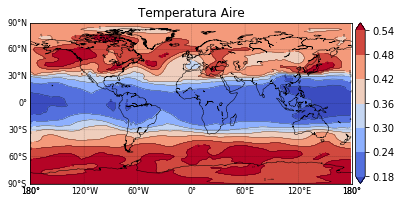

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
from numpy import float32



lat = np.arange(90,-92.5,-2.5)
lon = np.arange(0,360,2.5)

a = X_train[1].reshape(73, 144)

# make some plot 
#print('Ploting...')
#plt.figure() #setting the figure size

map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180)      
#This like sets the lat lon of the plot. Projection cylinder. 

map.drawcoastlines(linewidth=.5)  #draws coastline 

parallels = np.arange(-90,91,30.) # make latitude lines ever 30 degrees from 30N-50N
meridians = np.arange(-180,180,60.) # make longitude lines every 60 degrees from 95W to 70W

#labelling the lat and lon dimesion

map.drawparallels(parallels,labels=[1,0,0,0],linewidth=0.2,fontsize=8)
map.drawmeridians(meridians,labels=[0,0,0,1],linewidth=0.2,fontsize=8)

a, lonout = shiftgrid(180, a, lon, start=False, cyclic=360.0)
lons,lats= np.meshgrid(lonout,lat) #2D lat lon to plot contours



x,y = map(lons,lats)


csf = map.contourf(x,y,a, extend='both',cmap='coolwarm') #filled contour
cb = map.colorbar(csf,"right", extend='both',size="3%", pad="1%")
cs = map.contour(x,y,a,colors='k',linewidths=0.3)


plt.clabel(cs, inline=True, fmt='%1.0f', fontsize=3, colors='k')
plt.title('Temperatura Aire')
plt.show()

plt.close()




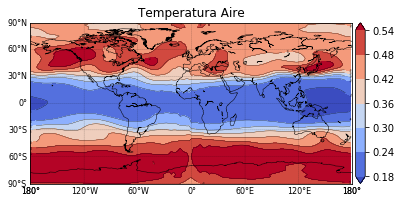

In [0]:
lat = np.arange(90,-92.5,-2.5)
lon = np.arange(0,360,2.5)


b = decoded_imgs[1].reshape(73, 144)

# make some plot 
#print('Ploting...')
#plt.figure() #setting the figure size

map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180)      
#This like sets the lat lon of the plot. Projection cylinder. 

map.drawcoastlines(linewidth=.5)  #draws coastline 

parallels = np.arange(-90,91,30.) # make latitude lines ever 30 degrees from 30N-50N
meridians = np.arange(-180,180,60.) # make longitude lines every 60 degrees from 95W to 70W

#labelling the lat and lon dimesion

map.drawparallels(parallels,labels=[1,0,0,0],linewidth=0.2,fontsize=8)
map.drawmeridians(meridians,labels=[0,0,0,1],linewidth=0.2,fontsize=8)

b, lonout = shiftgrid(180, b, lon, start=False, cyclic=360.0)
lons,lats= np.meshgrid(lonout,lat) #2D lat lon to plot contours



x,y = map(lons,lats)


csf = map.contourf(x,y,b, extend='both',cmap='coolwarm') #filled contour
cb = map.colorbar(csf,"right", extend='both',size="3%", pad="1%")
cs = map.contour(x,y,b,colors='k',linewidths=0.3)


plt.clabel(cs, inline=True, fmt='%1.0f', fontsize=3, colors='k')
plt.title('Temperatura Aire')
plt.show()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
decoded_imgs[0]

In [0]:
X_train[0]